In [2]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [52]:
data = pd.read_csv("Company_Data.csv")
data 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


{'whiskers': [<matplotlib.lines.Line2D at 0x2b9c6aef1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b9c6aec520>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b9c6af1a60>],
 'medians': [<matplotlib.lines.Line2D at 0x2b9c6aecfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b9c6aea340>],
 'means': []}

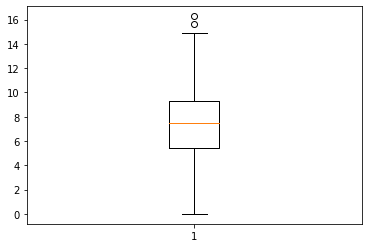

In [54]:
plt.boxplot(data['Sales'])

In [53]:
Data = pd.get_dummies(data)
Data 

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [5]:
df= Data.drop(columns=["ShelveLoc_Bad","ShelveLoc_Medium",'Urban_No','US_No'])

In [6]:
Company = df.rename(columns={'ShelveLoc_Good':'ShelveLoc','Urban_Yes':'Urban','US_Yes':'US'})
Company

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,9.50,138,73,11,276,120,42,17,0,1,1
1,11.22,111,48,16,260,83,65,10,1,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1
4,4.15,141,64,3,340,128,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,1
396,6.14,139,23,3,37,120,55,11,0,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1
398,5.94,100,79,7,284,95,50,12,0,1,1


In [7]:
Company.loc[Company['Sales'] <= 8.5, 'Category'] = 'low'  
Company.loc[Company['Sales'] >= 8.5, 'Category'] = 'high'  
Company 

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US,Category
0,9.50,138,73,11,276,120,42,17,0,1,1,high
1,11.22,111,48,16,260,83,65,10,1,1,1,high
2,10.06,113,35,10,269,80,59,12,0,1,1,high
3,7.40,117,100,4,466,97,55,14,0,1,1,low
4,4.15,141,64,3,340,128,38,13,0,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,1,high
396,6.14,139,23,3,37,120,55,11,0,0,1,low
397,7.41,162,26,12,368,159,40,18,0,1,1,low
398,5.94,100,79,7,284,95,50,12,0,1,1,low


In [8]:
df1=Company.drop(columns=['Sales'])
df1  
company_data = df1.rename(columns={'Category':'Sales'})
company_data

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US,Sales
0,138,73,11,276,120,42,17,0,1,1,high
1,111,48,16,260,83,65,10,1,1,1,high
2,113,35,10,269,80,59,12,0,1,1,high
3,117,100,4,466,97,55,14,0,1,1,low
4,141,64,3,340,128,38,13,0,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,1,high
396,139,23,3,37,120,55,11,0,0,1,low
397,162,26,12,368,159,40,18,0,1,1,low
398,100,79,7,284,95,50,12,0,1,1,low


<AxesSubplot:xlabel='CompPrice', ylabel='Income'>

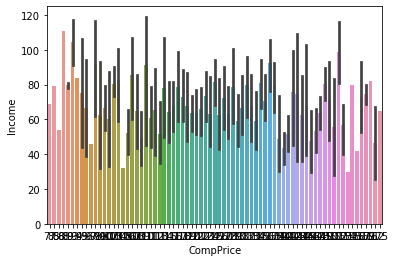

In [47]:
import seaborn as sns 
sns.barplot (x='CompPrice', y='Income', data=company_data)

<AxesSubplot:xlabel='CompPrice', ylabel='Sales'>

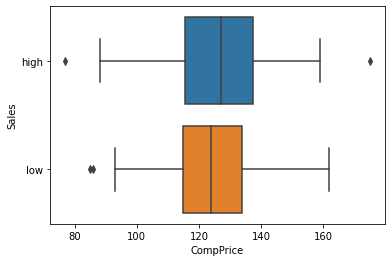

In [55]:
sns.boxplot(x='CompPrice', y='Sales', data=company_data)

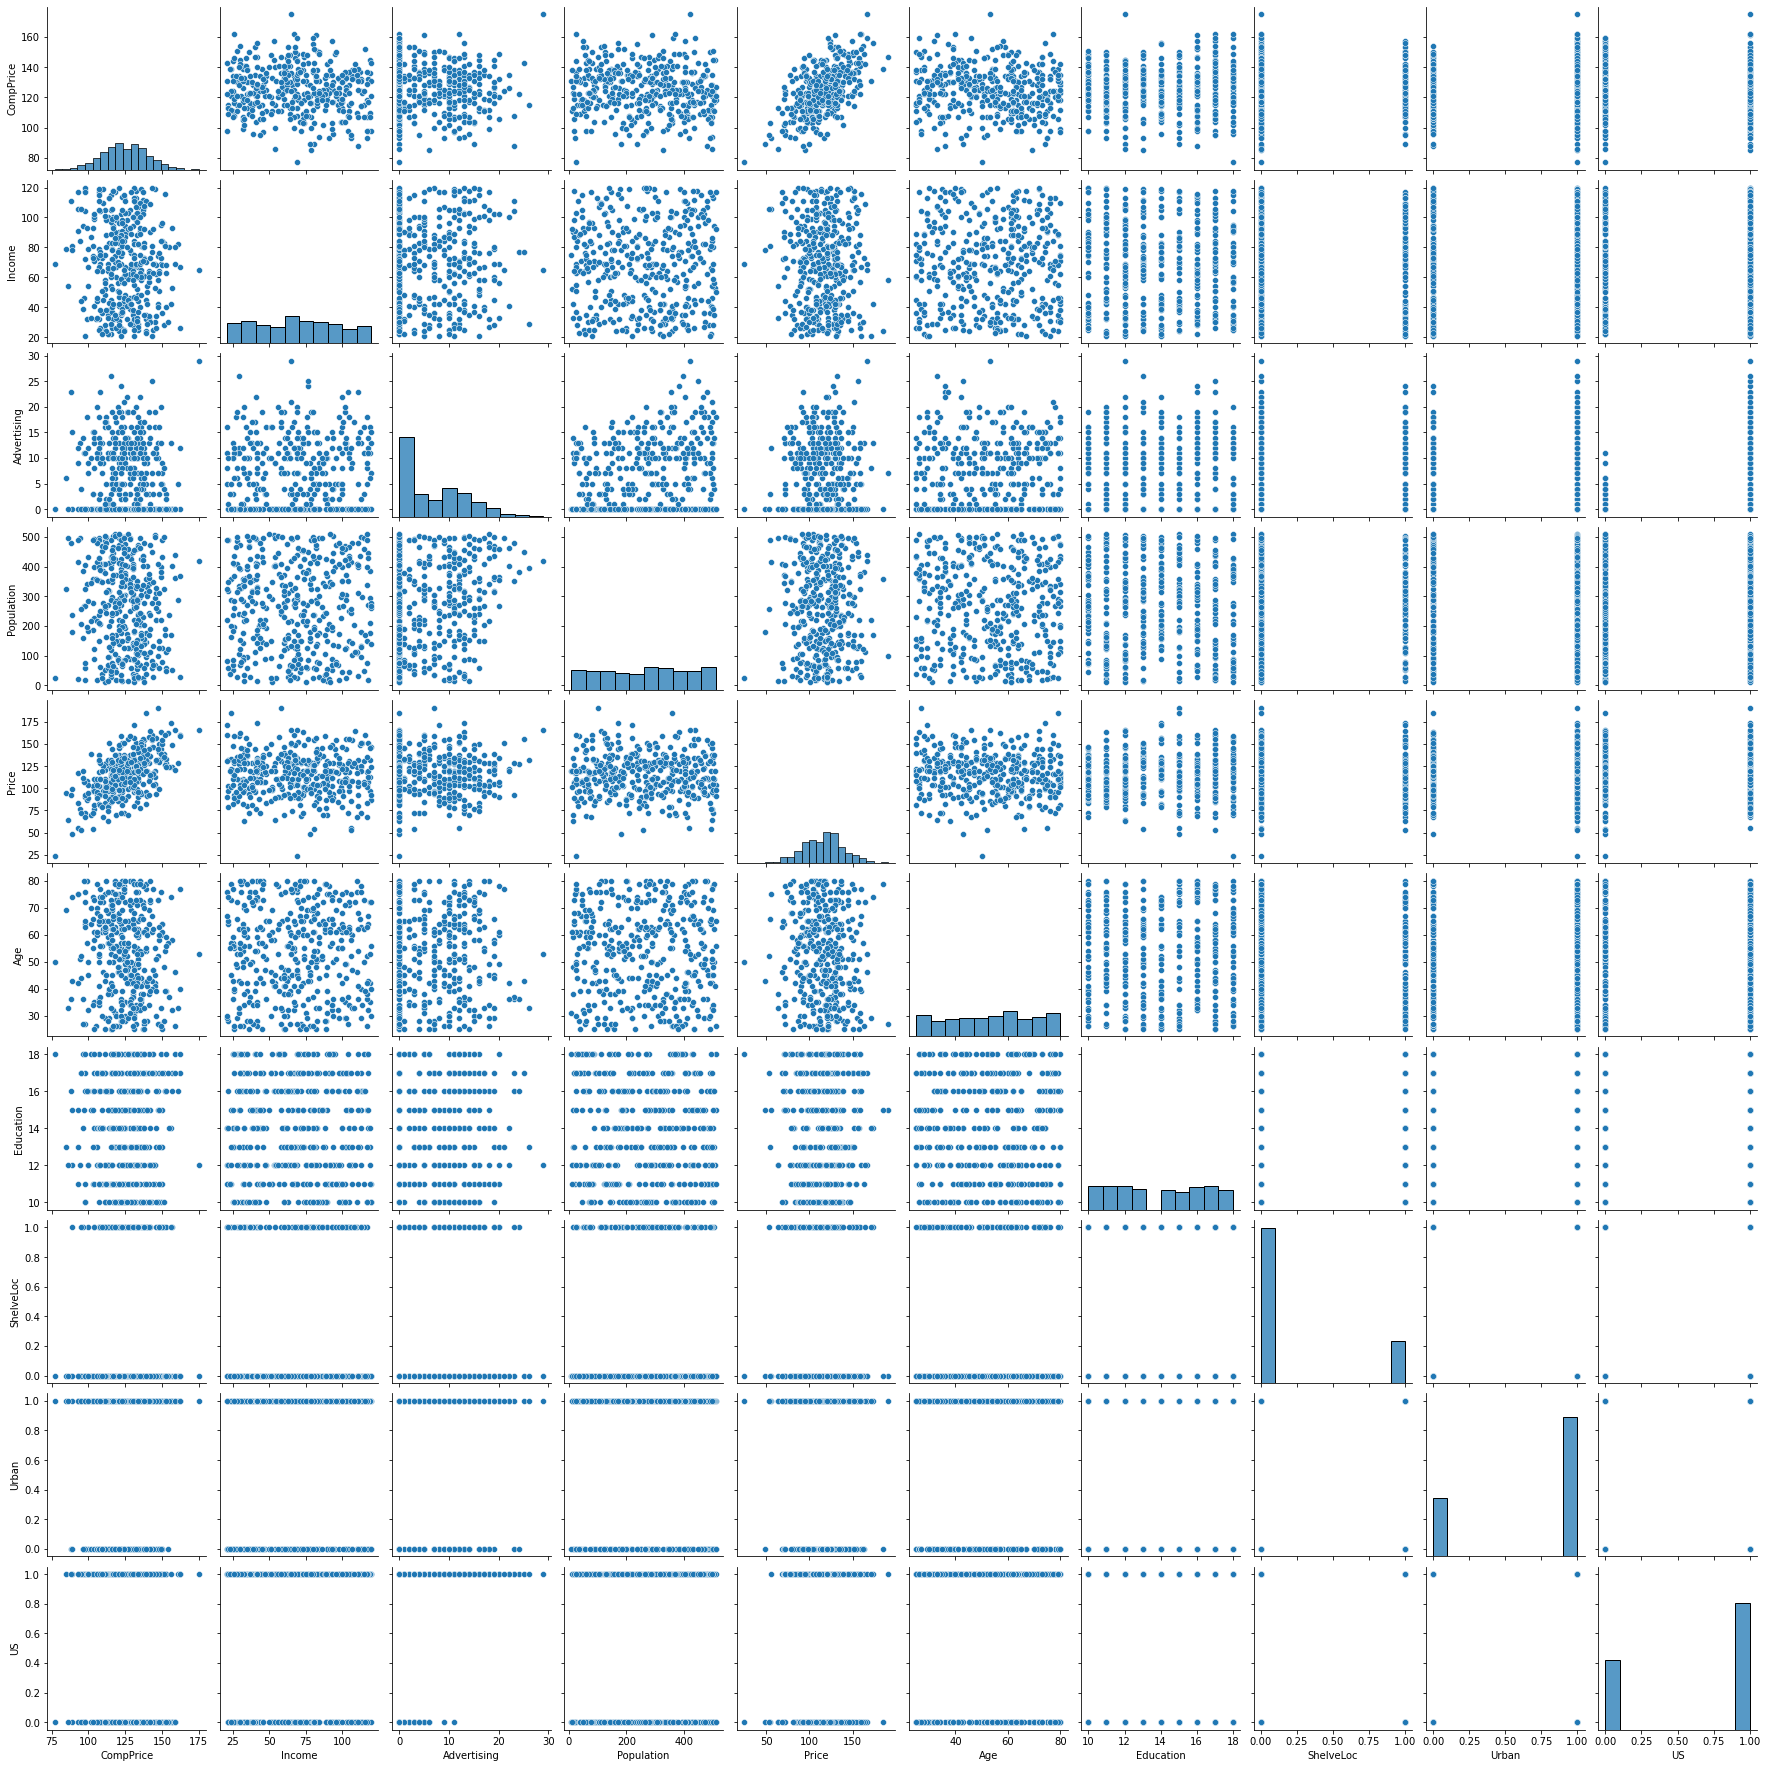

In [56]:
sns.pairplot(company_data)

In [9]:
company_data.Sales.value_counts() 

low     257
high    143
Name: Sales, dtype: int64

In [10]:
x = company_data.iloc[:,0:10]
y = company_data.iloc[:,10]

In [11]:
x 

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,138,73,11,276,120,42,17,0,1,1
1,111,48,16,260,83,65,10,1,1,1
2,113,35,10,269,80,59,12,0,1,1
3,117,100,4,466,97,55,14,0,1,1
4,141,64,3,340,128,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,1
396,139,23,3,37,120,55,11,0,0,1
397,162,26,12,368,159,40,18,0,1,1
398,100,79,7,284,95,50,12,0,1,1


In [22]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2) 

In [25]:
y_train.value_counts()

y_test.value_counts()

low     52
high    28
Name: Sales, dtype: int64

In [27]:
model =RandomForestClassifier(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.815625

In [29]:
##Predicting on training data
pred_train = model.predict(x_train)
pred_train

array(['low', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'high',
       'high', 'high', 'low', 'low', 'low', 'low', 'high', 'low', 'low',
       'high', 'low', 'high', 'high', 'low', 'low', 'high', 'low', 'low',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'high', 'high',
       'high', 'low', 'high', 'high', 'low', 'low', 'low', 'high', 'high',
       'low', 'low', 'high', 'high', 'low', 'high', 'high', 'high', 'low',
       'low', 'low', 'low', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'low', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'low', 'low',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'high', 'low', 'high', 'low', 'low', 'high', 'high', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'low', 'low', 'high', 'high', 'high', 'l

In [33]:
##Accuracy on training data
from sklearn.metrics import accuracy_score
accuracy_score(y_train,pred_train)


1.0

In [37]:
pred_test = model.predict(x_test)
accuracy_score(y_test,pred_test)


0.7625

In [57]:
pred_test

array(['high', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'high', 'low', 'low', 'high', 'low', 'high', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'high', 'low', 'high',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'high',
       'low', 'low', 'high', 'low', 'low', 'low', 'high', 'high', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'high', 'high', 'low',
       'low', 'high', 'high', 'high', 'high', 'low', 'low', 'high', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low', 'high',
       'low', 'low', 'high', 'low', 'low', 'low', 'high', 'low', 'low'],
      dtype=object)

In [60]:
df2=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
df2 

,Actual,Predicted
155,low,high
328,low,low
187,low,low
78,low,low
161,low,low
...,...,...
289,high,low
156,low,low
391,low,high
327,low,low


In [61]:
pd.crosstab(y_test,pred_test)  # getting the 2 way table to understand the correct and wrong predictions

col_0,high,low
Sales,,
high,19,9
low,10,42


In [ ]:
#Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 76%
# As seen from the cross tab, 61 predictions are correct and the remaining are not predicted correctly